In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf

# SET WORK DERC

# For my Mac
# os.chdir('//Users//patricklee//Desktop//파이썬//DACON//AI_workout')

# For my Desktop
os.chdir('C://Users//BIS_COM//data//dacon/workout/')

In [77]:
train=pd.read_csv('./new_value_df.csv',)
train_labels=pd.read_csv('./train_labels.csv')
test=pd.read_csv('./new_test_df.csv')
submission=pd.read_csv('./sample_submission.csv')

In [6]:
merge_train = pd.merge(train,train_labels,how="outer",on="id")
merge_train

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z,pitch,roll,angle_z,gg_x,gg_y,gg_z,label,label_desc
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112,79.073624,-8.396683,-83.058839,-0.011832,-0.610980,-0.633522,37,Shoulder Press (dumbbell)
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216,78.159835,-8.698302,-82.029235,0.006062,-0.782782,-0.498544,37,Shoulder Press (dumbbell)
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629,76.226605,-8.352177,-79.126797,-0.072346,-0.882451,-0.500393,37,Shoulder Press (dumbbell)
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013,76.298763,-9.967037,-80.694753,0.054260,-1.071957,-0.549080,37,Shoulder Press (dumbbell)
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234,77.384519,-8.096783,-80.390898,0.085734,-1.158131,-0.559225,37,Shoulder Press (dumbbell)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437,-44.665405,-40.505406,73.156120,-0.587357,-2.080273,-1.525809,2,Bicep Curl
1874996,3124,596,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087,-42.855425,-40.971520,70.862773,-0.602982,-2.035936,-1.532502,2,Bicep Curl
1874997,3124,597,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125,-41.189947,-41.333028,68.854788,-0.557462,-1.975521,-1.587302,2,Bicep Curl
1874998,3124,598,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478,-39.017186,-42.961261,68.092120,-0.472731,-1.982790,-1.605190,2,Bicep Curl


In [9]:
X=tf.reshape(np.array(train.iloc[:,2:]),[-1, 600, 12])
X.shape

TensorShape([3125, 600, 12])

In [11]:
y = tf.keras.utils.to_categorical(train_labels['label']) 
y.shape

(3125, 61)

In [13]:
from keras.models import Sequential
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dense, LSTM,Dropout, GRU

In [34]:
model_t = Sequential()
model_t.add(Conv1D(filters = 32,kernel_size= 5, activation='relu',input_shape=(600,12)))
model_t.add(Conv1D(kernel_size=5, filters = 64,activation='relu'))
model_t.add(MaxPooling1D(pool_size=2))
model_t.add(Dropout(0.5))
model_t.add(Conv1D(filters = 128,kernel_size= 5, activation='relu',input_shape=(600,12)))
model_t.add(Conv1D(kernel_size=5, filters=256,activation='relu'))
model_t.add(MaxPooling1D(pool_size=2))
model_t.add(Dropout(0.5))
model_t.add(LSTM(55))
model_t.add(Dense(128, activation='relu'))
model_t.add(Dense(61, activation='softmax'))
model_t.summary()

model_t.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_22 (Conv1D)           (None, 596, 32)           1952      
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 592, 64)           10304     
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 296, 64)           0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 296, 64)           0         
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 292, 128)          41088     
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 288, 256)          164096    
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 144, 256)         

In [35]:
history = model_t.fit(X,y, epochs=500, batch_size=128, validation_split=0.2, verbose=0)

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
                      
Epoch_range = range(1, len(acc) + 1)
Epoch_range

range(1, 501)

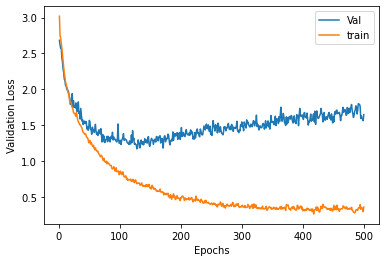

In [64]:
import matplotlib.pyplot as plt

plt.plot(Epoch_range, val_loss,label="Val")
plt.plot(Epoch_range, loss, label="train")
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

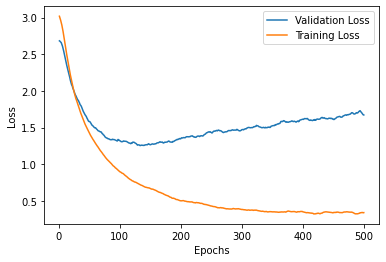

In [65]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points


smooth_val_loss_history = smooth_curve(val_loss[0:])
smooth_loss_history = smooth_curve(loss[0:])

plt.plot(Epoch_range, smooth_val_loss_history,label="Validation Loss")
plt.plot(Epoch_range, smooth_loss_history, label="Training Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

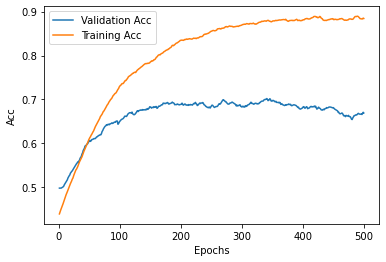

In [66]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points


smooth_val_loss_history = smooth_curve(val_acc[0:])
smooth_loss_history = smooth_curve(acc[0:])

plt.plot(Epoch_range, smooth_val_loss_history,label="Validation Acc")
plt.plot(Epoch_range, smooth_loss_history, label="Training Acc")
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

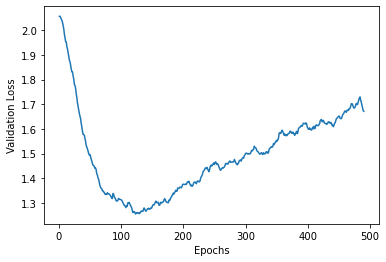

In [61]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points


smooth_val_history = smooth_curve(val_history[10:])

plt.plot(range(1, len(smooth_val_history) + 1), smooth_val_history)
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.show()

In [69]:
val_loss.index(min(val_loss))

127

# Overfitting > 120

In [70]:
model_t = Sequential()
model_t.add(Conv1D(filters = 32,kernel_size= 5, activation='relu',input_shape=(600,12)))
model_t.add(Conv1D(kernel_size=5, filters = 64,activation='relu'))
model_t.add(MaxPooling1D(pool_size=2))
model_t.add(Dropout(0.5))
model_t.add(Conv1D(filters = 128,kernel_size= 5, activation='relu',input_shape=(600,12)))
model_t.add(Conv1D(kernel_size=5, filters=256,activation='relu'))
model_t.add(MaxPooling1D(pool_size=2))
model_t.add(Dropout(0.5))
model_t.add(LSTM(55))
model_t.add(Dense(128, activation='relu'))
model_t.add(Dense(61, activation='softmax'))
model_t.summary()

model_t.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_26 (Conv1D)           (None, 596, 32)           1952      
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 592, 64)           10304     
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 296, 64)           0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 296, 64)           0         
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 292, 128)          41088     
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 288, 256)          164096    
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 144, 256)         

In [71]:
history = model_t.fit(X,y, epochs=120, batch_size=128, validation_split=0.2, verbose=0)

In [73]:
submission

,id,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,3125,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3126,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3127,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3128,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3129,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,3903,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
779,3904,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
780,3905,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 12])
test_X.shape

prediction=model_t.predict(test_X)

submission.iloc[:,1:]=prediction

submission.to_csv('1_try.csv')